### Data

In [45]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, GlobalAveragePooling2D, Flatten, BatchNormalization, MaxPool2D, Activation, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import L2
import os
from collections import Counter

In [3]:
classes = os.listdir('train')

In [4]:
classes.remove('.ipynb_checkpoints')

In [5]:
classes

['sad', 'disgusted', 'happy', 'angry', 'surprised', 'fearful', 'neutral']

In [6]:
train = 'train'

In [107]:
train_gen = ImageDataGenerator(rescale = 1./255.,
                               # rotation_range = 10,
                               # zoom_range = 0.2, 
                               # shear_range = 0.2,
                               # horizontal_flip = True,
                               # vertical_flip = True,
                               validation_split = 0.1)
train_data = train_gen.flow_from_directory(train, target_size = (48 ,48), classes = classes, batch_size = 128, shuffle = True, subset = 'training')

Found 25841 images belonging to 7 classes.


In [108]:
val_data = train_gen.flow_from_directory(train, target_size = (48, 48), classes = classes, batch_size = 1, shuffle = True, subset = 'validation')

Found 2868 images belonging to 7 classes.


In [90]:
train_data[0][0][0].shape

(48, 48, 1)

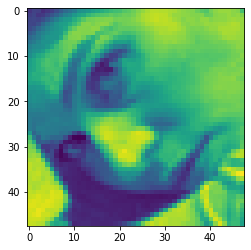

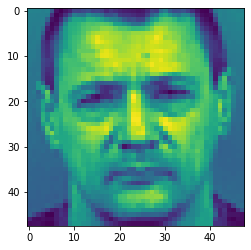

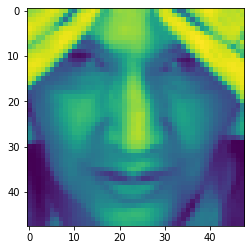

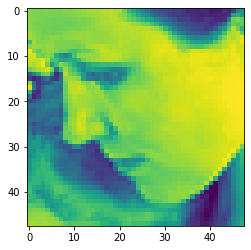

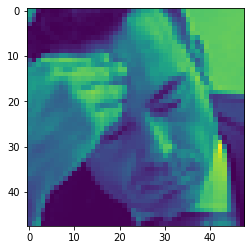

In [91]:
for i in range(5):
    plt.imshow(train_data[0][0][i])
    plt.show()

In [8]:
counter = Counter(train_data.classes)

In [ ]:
max_val = float(max(counter.values()))

In [ ]:
class_vals = {class_id : max_val/num_val for class_id, num_val in counter.items()}

In [ ]:
class_vals

{0: 1.4939038417299286,
 1: 1.0,
 2: 1.8058954393770856,
 3: 2.2754029432375615,
 4: 1.7608459869848156,
 5: 1.4531215036921012}

### Model

In [111]:
model = Sequential([
    Conv2D(64, (3, 3), input_shape = (48, 48, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D((2, 2), padding = 'same'),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D((2, 2), padding = 'same'),
    Dropout(0.25),
    
    Conv2D(512, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D((2, 2), padding = 'same'),
    Dropout(0.25),
    
    Conv2D(512, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D((2, 2), padding = 'same'),
    Dropout(0.25),
    
    Flatten(),
    
    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.25),
    
    Dense(7, activation = 'softmax')
    
])

In [112]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 48, 48, 64)        1792      
_________________________________________________________________
batch_normalization_78 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_74 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_78 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
batch_normalization_79 (Batc (None, 24, 24, 128)     

In [113]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [114]:
cb = tf.keras.callbacks.ModelCheckpoint(filepath = 'model1.ckpt', save_weights_only = True, verbose = 1)

In [136]:
model.load_weights('model1.ckpt')

In [140]:
model.fit(train_data, epochs = 100, callbacks = [cb], validation_data = val_data)

Epoch 1/100
 22/202 [==>...........................] - ETA: 28s - loss: 0.1810 - accuracy: 0.9403

KeyboardInterrupt: 

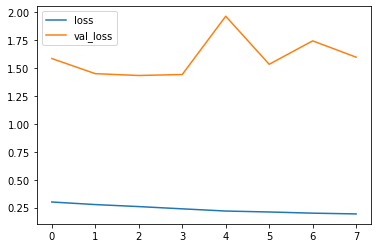

In [137]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

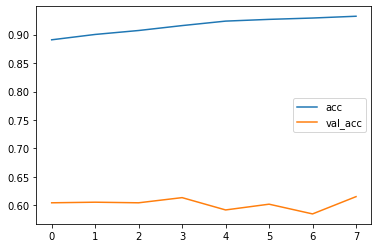

In [138]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])

In [139]:
model.evaluate(val_data)

2868/2868 [==============================] - 8s 3ms/step - loss: 1.5981 - accuracy: 0.6154


[1.598130702972412, 0.6154114603996277]

In [134]:
model.save('best.h5')

Best Model = best.h5

Val_acc = 61.54%

Val_err = 1.598

Arch:
model = Sequential([

    Conv2D(64, (3, 3), input_shape = (48, 48, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D((2, 2), padding = 'same'),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D((2, 2), padding = 'same'),
    Dropout(0.25),
    
    Conv2D(512, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D((2, 2), padding = 'same'),
    Dropout(0.25),
    
    Conv2D(512, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D((2, 2), padding = 'same'),
    Dropout(0.25),
    
    Flatten(),
    
    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.25),
    
    # Dense(256),
    # BatchNormalization(),
    # Activation('relu'),
    # Dropout(0.5),
    
    Dense(7, activation = 'softmax')
    
])